In [1]:
#import var_code as VC
import numpy as np
import numba as nb
import os
from scipy.interpolate import CubicSpline
import pandas as pd
import BeginnersGraphs as ev
import CuteGraphs as te

In [2]:
def generate_csv(npz_file, folder_name = " "):
    load_data = np.load(npz_file)

    T = load_data['T']
    dQdt = load_data['dQdt']
    dqdt = np.nan_to_num(dQdt, copy=True, nan=0.0, posinf=None, neginf=None)
    pn = load_data['pn']
    NP = load_data['np']
    rhonu = load_data['rhonu']

    T_reversed = T[::-1]
    dqdt_reversed = dqdt[::-1]
    pn_reversed = pn[::-1]
    np_reversed = NP[::-1]
    rhonu_reversed = rhonu[::-1]

    T_fit_dqdt = CubicSpline(T_reversed, dqdt_reversed) #cubic spline fit 
    T_fit_pn = CubicSpline(T_reversed, pn_reversed) #cubic spline fit 
    T_fit_np = CubicSpline(T_reversed, np_reversed) #cubic spline fit 
    T_fit_rhonu = CubicSpline(T_reversed, rhonu_reversed) #cubic spline fit 

    #determine coefficients a,b,c,d:
    d_dqdt = T_fit_dqdt(T)
    c_dqdt = T_fit_dqdt(T,1)
    b_dqdt = T_fit_dqdt(T,2)*.5
    a_dqdt = T_fit_dqdt(T,3)*(1/6)

    d_pn = T_fit_pn(T)
    c_pn = T_fit_pn(T,1)
    b_pn = T_fit_pn(T,2)*.5
    a_pn = T_fit_pn(T,3)*(1/6)

    d_np = T_fit_np(T)
    c_np = T_fit_np(T,1)
    b_np = T_fit_np(T,2)*.5
    a_np = T_fit_np(T,3)*(1/6)

    d_rhonu = T_fit_rhonu(T)
    c_rhonu = T_fit_rhonu(T,1)
    b_rhonu = T_fit_rhonu(T,2)*.5
    a_rhonu = T_fit_rhonu(T,3)*(1/6)
    
    try:
        os.mkdir(folder_name)
    except OSError as e:
        print("Directory exists")
        
    te.delete_file(folder_name + "T_dqdt.csv")
    te.delete_file(folder_name + "a_dqdt.csv")
    te.delete_file(folder_name + "b_dqdt.csv")
    te.delete_file(folder_name + "c_dqdt.csv")
    te.delete_file(folder_name + "d_dqdt.csv")

    te.delete_file(folder_name + "T_pn.csv")
    te.delete_file(folder_name + "a_pn.csv")
    te.delete_file(folder_name + "b_pn.csv")
    te.delete_file(folder_name + "c_pn.csv")
    te.delete_file(folder_name + "d_pn.csv")

    te.delete_file(folder_name + "T_np.csv")
    te.delete_file(folder_name + "a_np.csv")
    te.delete_file(folder_name + "b_np.csv")
    te.delete_file(folder_name + "c_np.csv")
    te.delete_file(folder_name + "d_np.csv")

    te.delete_file(folder_name + "T_rhonu.csv")
    te.delete_file(folder_name + "a_rhonu.csv")
    te.delete_file(folder_name + "b_rhonu.csv")
    te.delete_file(folder_name + "c_rhonu.csv")
    te.delete_file(folder_name + "d_rhonu.csv")
    
    T_dqdt_csv = pd.DataFrame(T).to_csv(folder_name + 'T_dqdt.csv')
    a_dqdt_csv = pd.DataFrame(a_dqdt).to_csv(folder_name + 'a_dqdt.csv')
    b_dqdt_csv = pd.DataFrame(b_dqdt).to_csv(folder_name + 'b_dqdt.csv')
    c_dqdt_csv = pd.DataFrame(c_dqdt).to_csv(folder_name + 'c_dqdt.csv')
    d_dqdt_csv = pd.DataFrame(d_dqdt).to_csv(folder_name + 'd_dqdt.csv')

    T_pn_csv = pd.DataFrame(T).to_csv(folder_name + 'T_pn.csv')
    a_pn_csv = pd.DataFrame(a_pn).to_csv(folder_name + 'a_pn.csv')
    b_pn_csv = pd.DataFrame(b_pn).to_csv(folder_name + 'b_pn.csv')
    c_pn_csv = pd.DataFrame(c_pn).to_csv(folder_name + 'c_pn.csv')
    d_pn_csv = pd.DataFrame(d_pn).to_csv(folder_name + 'd_pn.csv')

    T_np_csv = pd.DataFrame(T).to_csv(folder_name + 'T_np.csv')
    a_np_csv = pd.DataFrame(a_np).to_csv(folder_name + 'a_np.csv')
    b_np_csv = pd.DataFrame(b_np).to_csv(folder_name + 'b_np.csv')
    c_np_csv = pd.DataFrame(c_np).to_csv(folder_name + 'c_np.csv')
    d_np_csv = pd.DataFrame(d_np).to_csv(folder_name + 'd_np.csv')

    T_rhonu_csv = pd.DataFrame(T).to_csv(folder_name + 'T_rhonu.csv')
    a_rhonu_csv = pd.DataFrame(a_rhonu).to_csv(folder_name + 'a_rhonu.csv')
    b_rhonu_csv = pd.DataFrame(b_rhonu).to_csv(folder_name + 'b_rhonu.csv')
    c_rhonu_csv = pd.DataFrame(c_rhonu).to_csv(folder_name + 'c_rhonu.csv')
    d_rhonu_csv = pd.DataFrame(d_rhonu).to_csv(folder_name + 'd_rhonu.csv')
    
    return folder_name

In [3]:
folder = generate_csv('new_movie_arrays.npz', folder_name = "CSV Files/")
#print(folder)

Directory exists
CSV Files/


In [4]:
ev.clean_directory('C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2', 'alter_vs.c')


make: Circular alter_vs.c <- alter_vs.c dependency dropped.



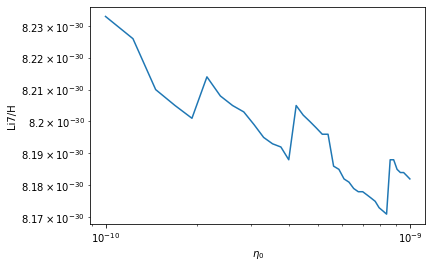

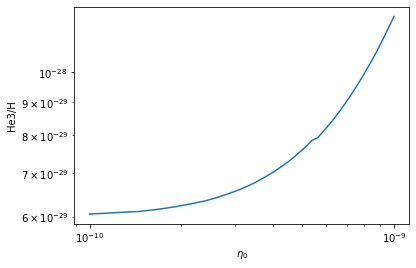

In [5]:
ev.output_plots_alter_vs(1e-10, 10e-10, 40, 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/alter_vs.x')
%time

In [8]:
ev.clean_directory('C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2', 'alter_eta_edit.c')


make: Circular alter_eta_edit.c <- alter_eta_edit.c dependency dropped.



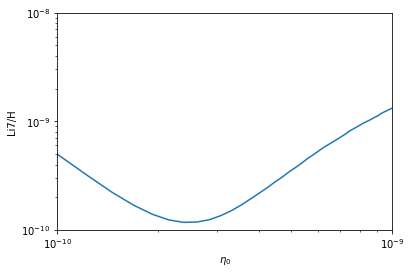

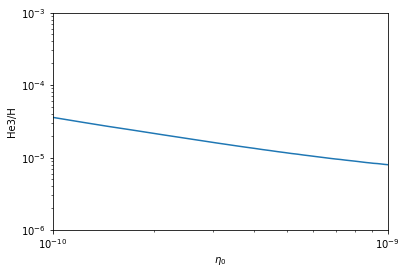

Wall time: 0 ns


In [9]:
ev.output_plots_alter_eta(1e-10, 10e-10, 40, 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/alter_eta_edit.x')
%time

In [10]:
ev.clean_directory('C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2', 'alter_eta_edit.c')
te.delete_file("evolution.out") 


make: Circular alter_eta_edit.c <- alter_eta_edit.c dependency dropped.



Wall time: 0 ns


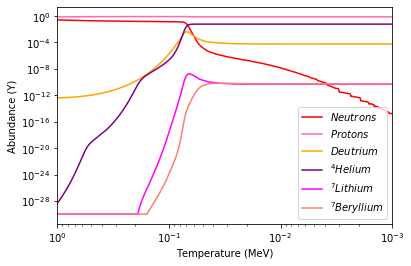

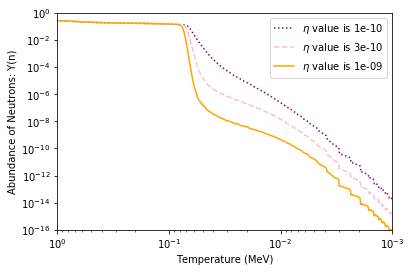

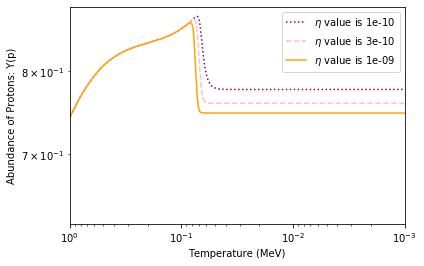

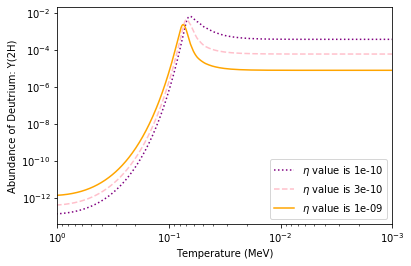

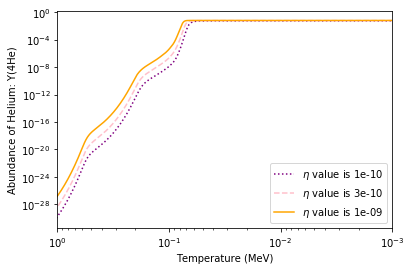

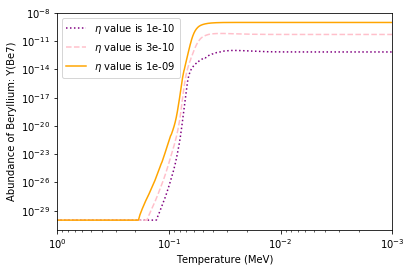

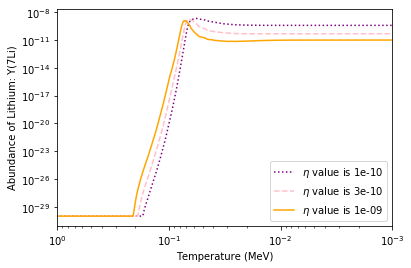

In [11]:
temperature_str_high, Y_n_str_high, Y_p_str_high, Y_2H_str_high, Y_4He_str_high, Y_7Li_str_high, Y_Be7_str_high, eta_value_high = te.eta_element_string(10e-10, 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/alter_eta_edit.x')

temperature_str_med, Y_n_str_med, Y_p_str_med, Y_2H_str_med, Y_4He_str_med, Y_7Li_str_med, Y_Be7_str_med, eta_value_med = te.eta_element_string(3e-10, 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/alter_eta_edit.x')

temperature_str_low, Y_n_str_low, Y_p_str_low, Y_2H_str_low, Y_4He_str_low, Y_7Li_str_low, Y_Be7_str_low, eta_value_low = te.eta_element_string(1e-10, 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/alter_eta_edit.x')

te.generate_plots_eta_element_temp(temperature_str_high, Y_n_str_high, Y_p_str_high, Y_2H_str_high, Y_4He_str_high, Y_7Li_str_high, Y_Be7_str_high, eta_value_high, temperature_str_med, Y_n_str_med, Y_p_str_med, Y_2H_str_med, Y_4He_str_med, Y_7Li_str_med, Y_Be7_str_med, eta_value_med, temperature_str_low, Y_n_str_low, Y_p_str_low, Y_2H_str_low, Y_4He_str_low, Y_7Li_str_low, Y_Be7_str_low, eta_value_low)

%time

In [12]:
te.delete_file("evolution.out")

C:\Users\kathr\Chad_Research_Neutrinos\alterbbn_v2.2\CuteGraphs.py:263: RuntimeWarning: overflow encountered in double_scalars
  pt7 = np.e**(B[i]/T)
C:\Users\kathr\Chad_Research_Neutrinos\alterbbn_v2.2\CuteGraphs.py:306: RuntimeWarning: divide by zero encountered in true_divide
  ratio_n = Y_n_str/x_n_eq
C:\Users\kathr\Chad_Research_Neutrinos\alterbbn_v2.2\CuteGraphs.py:306: RuntimeWarning: overflow encountered in true_divide
  ratio_n = Y_n_str/x_n_eq


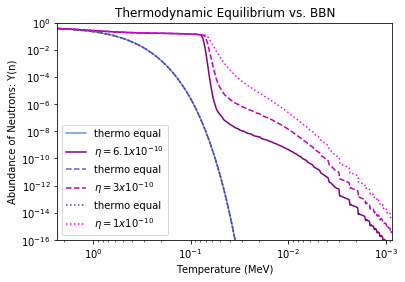

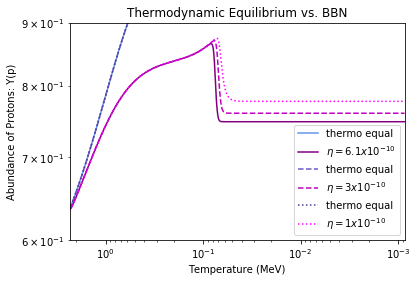

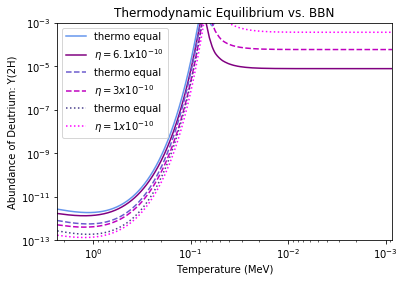

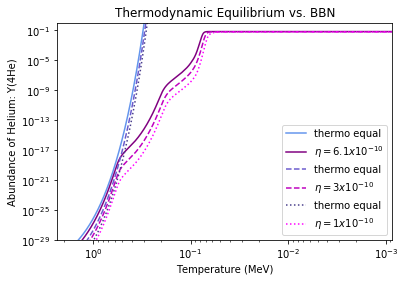

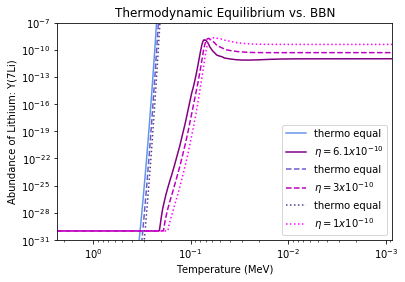

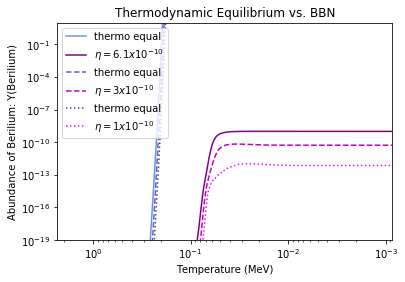

In [13]:
x_n_eq_h, x_p_eq_h, x_2H_eq_h, x_4He_eq_h, x_7Li_eq_h, x_7Be_eq_h, ratio_n_high, ratio_p_high, ratio_2H_high, ratio_4He_high, ratio_7Li_high, ratio_Be7_high  = te.thermo_equal_strings(temperature_str_high, Y_p_str_high, Y_n_str_high, Y_2H_str_high, Y_4He_str_high, Y_7Li_str_high, Y_Be7_str_high, eta_value_high)

x_n_eq_m, x_p_eq_m, x_2H_eq_m, x_4He_eq_m, x_7Li_eq_m, x_7Be_eq_m, ratio_n_med, ratio_p_med, ratio_2H_med, ratio_4He_med, ratio_7Li_med, ratio_Be7_med  = te.thermo_equal_strings(temperature_str_med, Y_p_str_med, Y_n_str_med, Y_2H_str_med, Y_4He_str_med, Y_7Li_str_med, Y_Be7_str_med, eta_value_med)

x_n_eq_L, x_p_eq_L, x_2H_eq_L, x_4He_eq_L, x_7Li_eq_L, x_7Be_eq_L, ratio_n_low, ratio_p_low, ratio_2H_low, ratio_4He_low, ratio_7Li_low, ratio_Be7_low  = te.thermo_equal_strings(temperature_str_low, Y_p_str_low, Y_n_str_low, Y_2H_str_low, Y_4He_str_low, Y_7Li_str_low, Y_Be7_str_low, eta_value_low)

te.generate_thermo_equal_plots(Y_n_str_high, Y_p_str_high, Y_2H_str_high, Y_4He_str_high, Y_7Li_str_high, Y_Be7_str_high, eta_value_high, Y_n_str_med, Y_p_str_med, Y_2H_str_med, Y_4He_str_med, Y_7Li_str_med, Y_Be7_str_med, eta_value_med, Y_n_str_low, Y_p_str_low, Y_2H_str_low, Y_4He_str_low, Y_7Li_str_low, Y_Be7_str_low, temperature_str_high, temperature_str_med, temperature_str_low, x_n_eq_h, x_p_eq_h, x_2H_eq_h, x_4He_eq_h, x_7Li_eq_h, x_7Be_eq_h, x_n_eq_m, x_p_eq_m, x_2H_eq_m, x_4He_eq_m, x_7Li_eq_m, x_7Be_eq_m, x_n_eq_L, x_p_eq_L, x_2H_eq_L, x_4He_eq_L, x_7Li_eq_L, x_7Be_eq_L)

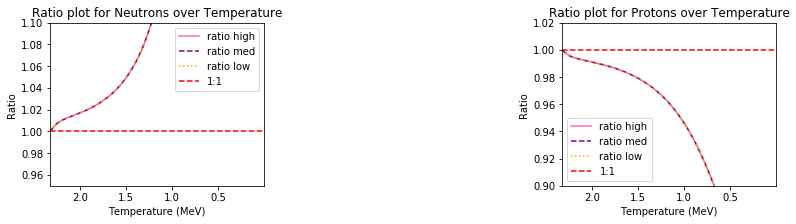

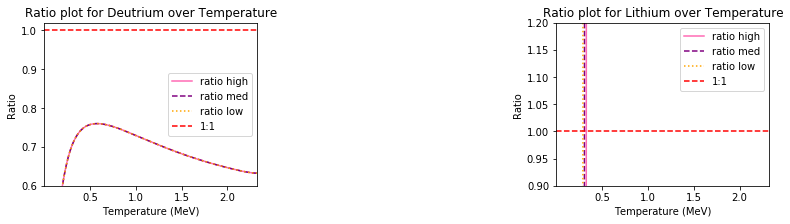

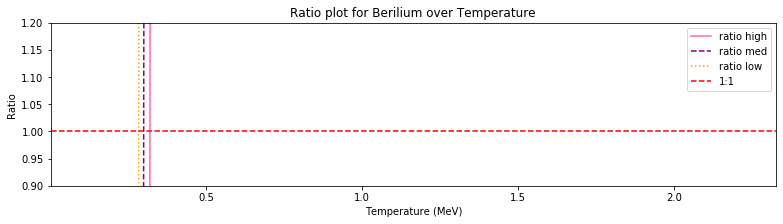

In [14]:
te.ratio_plots(temperature_str_high, temperature_str_med, temperature_str_low, ratio_n_high, ratio_p_high, ratio_2H_high, ratio_4He_high, ratio_7Li_high, ratio_Be7_high,  ratio_n_med, ratio_p_med, ratio_2H_med, ratio_4He_med, ratio_7Li_med, ratio_Be7_med, ratio_n_low, ratio_p_low, ratio_2H_low, ratio_4He_low, ratio_7Li_low, ratio_Be7_low)

In [15]:
y_n_h, y_2h_h, y_50_2h_h, y_4he_h, y_n_m, y_2h_m, y_50_2h_m, y_4he_m = te.mass_frac_str(Y_n_str_high, Y_2H_str_high, Y_4He_str_high, Y_n_str_med, Y_2H_str_med, Y_4He_str_med)

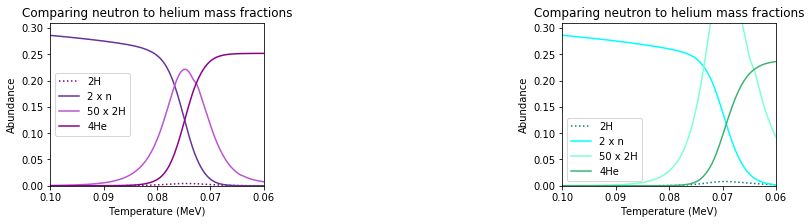

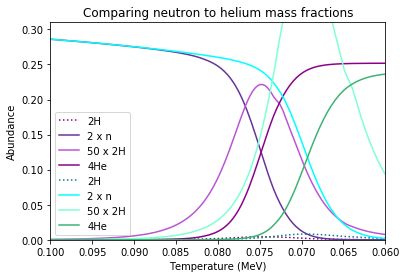

In [16]:
te.CompareHighMedMassFrac_seperate_plots(temperature_str_high, temperature_str_med, y_n_h, y_2h_h, y_50_2h_h, y_4he_h, y_n_m, y_2h_m, y_50_2h_m, y_4he_m)
te.CompareHighMedMassFrac(temperature_str_high, temperature_str_med, y_n_h, y_2h_h, y_50_2h_h, y_4he_h, y_n_m, y_2h_m, y_50_2h_m, y_4he_m)

C:\Users\kathr\Chad_Research_Neutrinos\alterbbn_v2.2\CuteGraphs.py:637: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 0.31)
C:\Users\kathr\Chad_Research_Neutrinos\alterbbn_v2.2\CuteGraphs.py:648: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 0.31)


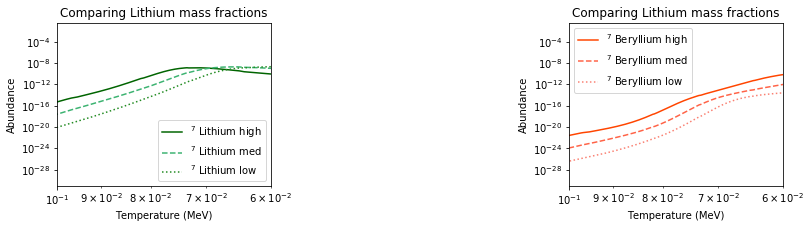

C:\Users\kathr\Chad_Research_Neutrinos\alterbbn_v2.2\CuteGraphs.py:620: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 0.31)


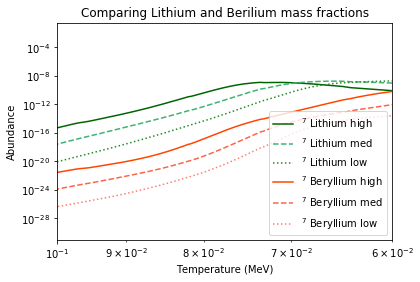

In [17]:
te.Li_Be_seperate_plots(temperature_str_high, temperature_str_med, temperature_str_low, Y_7Li_str_high, Y_7Li_str_med, Y_7Li_str_low, Y_Be7_str_high, Y_Be7_str_med, Y_Be7_str_low)
te.Li_Be(temperature_str_high, temperature_str_med, temperature_str_low, Y_7Li_str_high, Y_7Li_str_med, Y_7Li_str_low, Y_Be7_str_high, Y_Be7_str_med, Y_Be7_str_low)

In [18]:
te.delete_file("folder" + "T_dqdt.csv")
te.delete_file("folder" + "a_dqdt.csv")
te.delete_file("folder" + "b_dqdt.csv")
te.delete_file("folder" + "c_dqdt.csv")
te.delete_file("folder" + "d_dqdt.csv")

te.delete_file("folder" + "T_pn.csv")
te.delete_file("folder" + "a_pn.csv")
te.delete_file("folder" + "b_pn.csv")
te.delete_file("folder" + "c_pn.csv")
te.delete_file("folder" + "d_pn.csv")

te.delete_file("folder" + "T_np.csv")
te.delete_file("folder" + "a_np.csv")
te.delete_file("folder" + "b_np.csv")
te.delete_file("folder" + "c_np.csv")
te.delete_file("folder" + "d_np.csv")

te.delete_file("folder" + "T_rhonu.csv")
te.delete_file("folder" + "a_rhonu.csv")
te.delete_file("folder" + "b_rhonu.csv")
te.delete_file("folder" + "c_rhonu.csv")
te.delete_file("folder" + "d_rhonu.csv")